In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print('target_names: ' + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns = ['target'])
iris_data = pd.concat([x,y], axis = 1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0, 1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#將資料分為7:3，train 70%、test 30%
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']],
                                                    iris_data[['target']],
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
#為隨機取，所以為亂數
X_train

,sepal length (cm),petal length (cm)
60,5.0,3.5
80,5.5,3.8
90,5.5,4.4
68,6.2,4.5
51,6.4,4.5
...,...,...
96,5.7,4.2
67,5.8,4.1
64,5.6,3.6
47,4.6,1.4


In [7]:
len(X_train)

70

In [8]:
X_test

,sepal length (cm),petal length (cm)
26,5.0,1.6
86,6.7,4.7
2,4.7,1.3
55,5.7,4.5
75,6.6,4.4
93,5.0,3.3
16,5.4,1.3
73,6.1,4.7
54,6.5,4.6
95,5.7,4.2


In [9]:
len(X_test)

30

In [10]:
#資料標準化
from sklearn.preprocessing import StandardScaler

#標準化=(值-平均)/標準差

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
X_train_std

array([[-0.80800774,  0.43666598],
       [ 0.01648995,  0.64460217],
       [ 0.01648995,  1.06047453],
       [ 1.17078673,  1.12978659],
       [ 1.50058581,  1.12978659],
       [-0.47820866, -0.94957523],
       [ 0.34628903, -0.81095111],
       [ 1.33568627,  1.26841071],
       [ 1.00588719,  1.26841071],
       [ 1.50058581,  0.99116247],
       [-0.97290728, -1.01888729],
       [ 0.67608811,  0.92185041],
       [-1.79740498, -1.08819936],
       [-1.63250544, -1.08819936],
       [-0.80800774, -1.01888729],
       [ 0.34628903, -0.94957523],
       [-0.6431082 , -1.01888729],
       [-0.80800774, -1.08819936],
       [-1.79740498, -1.08819936],
       [-0.14840959, -0.81095111],
       [ 1.00588719,  1.19909865],
       [-0.47820866,  0.71391423],
       [-0.6431082 , -1.01888729],
       [-0.97290728, -0.94957523],
       [-0.47820866, -1.01888729],
       [ 2.48998304,  1.26841071],
       [-1.13780682, -0.88026317],
       [-0.80800774, -1.15751142],
       [-0.6431082 ,

In [12]:
from IPython.display import Math

In [13]:
Math(r'z=w^Tx')

<IPython.core.display.Math object>

In [14]:
#Logistic Regression涵式
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

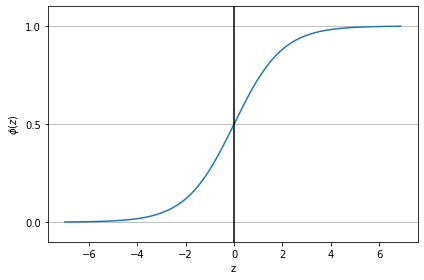

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

#y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('./figures/sigmoid.png', dpi = 300)
plt.show()

In [17]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train['target'].values)

C:\Users\kuanjung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from matplotlib.colors import ListedColormap

#視覺化程式
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.6,
                    c = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label = cl)
    
    #highlight test samples
    if test_idx:
        #plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please updat to Numpy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha = 1.0,
                    c = "",
                    edgecolor = 'black',
                    linewidths = 1,
                    marker = 'o',
                    label = 'test set',
                    s = 55)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


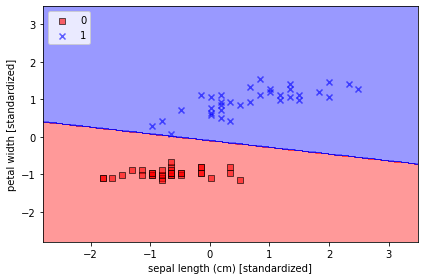

In [21]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier = lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [30]:
#標準化後的值
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [31]:
#檢測的值
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [32]:
#預測的正確率
error = 0
#i為idex，v為value
for i, v in enumerate(lr.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print(error)

0


In [26]:
#看到預測為0或1的機率
#第一筆資料[0.93,0.06]表示預測0和1的機率，所以判別為0
lr.predict_proba(X_test_std)

array([[0.93950553, 0.06049447],
       [0.00595915, 0.99404085],
       [0.9739773 , 0.0260227 ],
       [0.02129542, 0.97870458],
       [0.01197475, 0.98802525],
       [0.32115763, 0.67884237],
       [0.95291431, 0.04708569],
       [0.01005256, 0.98994744],
       [0.00869903, 0.99130097],
       [0.03873028, 0.96126972],
       [0.06753272, 0.93246728],
       [0.05271327, 0.94728673],
       [0.01644341, 0.98355659],
       [0.98768451, 0.01231549],
       [0.95017692, 0.04982308],
       [0.94875229, 0.05124771],
       [0.98695682, 0.01304318],
       [0.90907333, 0.09092667],
       [0.93786812, 0.06213188],
       [0.97541109, 0.02458891],
       [0.93950553, 0.06049447],
       [0.04459943, 0.95540057],
       [0.96441235, 0.03558765],
       [0.04100282, 0.95899718],
       [0.96541751, 0.03458249],
       [0.93611521, 0.06388479],
       [0.97082654, 0.02917346],
       [0.04714364, 0.95285636],
       [0.06396203, 0.93603797],
       [0.00445149, 0.99554851]])